In [22]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

In [23]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/bank-full.csv", sep=';' )
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Looking for missing values**




In [25]:
missing_values = data.isnull().mean()*100
missing_values.sum()

0.0

**Checking for duplicate values**



In [26]:
duplicateValues = data.duplicated().any()
if duplicateValues:
  print("Duplicate values present")
else:
  print("No duplicate values present")



No duplicate values present


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Detecting and removing outliers (Z-score method)**



In [28]:

numerical_features = data.dtypes==np.int64
numerical_col = data.columns[numerical_features].tolist()

#calculating the z-score
z = np.abs(stats.zscore(data[numerical_col]))
z


array([[1.60696496, 0.25641925, 1.29847633, ..., 0.56935064, 0.41145311,
        0.25194037],
       [0.28852927, 0.43789469, 1.29847633, ..., 0.56935064, 0.41145311,
        0.25194037],
       [0.74738448, 0.44676247, 1.29847633, ..., 0.56935064, 0.41145311,
        0.25194037],
       ...,
       [2.92540065, 1.42959305, 0.14341818, ..., 0.72181052, 1.43618859,
        1.05047333],
       [1.51279098, 0.22802402, 0.14341818, ..., 0.39902023, 0.41145311,
        0.25194037],
       [0.37068857, 0.52836436, 0.14341818, ..., 0.24656035, 1.4761376 ,
        4.52357654]])

In [29]:
#detecting the outliers
threshholdValue = 3
print(np.where(z>3))

(array([   34,    37,    43, ..., 45204, 45208, 45210]), array([1, 3, 3, ..., 6, 3, 6]))


In [30]:
#removing the outliers

data = data[(z < 3).all(axis=1)]
data.shape

(40209, 17)

**Convert binary features to numeric**



In [31]:
data.replace({'no':0,'yes':1}, inplace=True)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


**Encoding categorical values in the dataset**



In [32]:


ord_enc = OrdinalEncoder()
data['job_cat'] = ord_enc.fit_transform(data[["job"]])
data['marital_cat'] = ord_enc.fit_transform(data[["marital"]])
data['education_cat'] = ord_enc.fit_transform(data[["education"]])
data['contact_cat'] = ord_enc.fit_transform(data[["contact"]])
data['month_cat'] = ord_enc.fit_transform(data[["month"]])
data['poutcome_cat'] = ord_enc.fit_transform(data[["poutcome"]])


data[['job','job_cat']].head(5)





,job,job_cat
0,management,4.0
1,technician,9.0
2,entrepreneur,2.0
3,blue-collar,1.0
4,unknown,11.0


In [33]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_cat,marital_cat,education_cat,contact_cat,month_cat,poutcome_cat
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,4.0,1.0,2.0,2.0,8.0,3.0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,9.0,2.0,1.0,2.0,8.0,3.0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,2.0,1.0,1.0,2.0,8.0,3.0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1.0,1.0,3.0,2.0,8.0,3.0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,11.0,2.0,3.0,2.0,8.0,3.0


**Dropping the categorical columns**



In [34]:
data = data.drop(['job','marital','education','contact','month','duration','poutcome'], axis=1)
data.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,job_cat,marital_cat,education_cat,contact_cat,month_cat,poutcome_cat
0,58,0,2143,1,0,5,1,-1,0,0,4.0,1.0,2.0,2.0,8.0,3.0
1,44,0,29,1,0,5,1,-1,0,0,9.0,2.0,1.0,2.0,8.0,3.0
2,33,0,2,1,1,5,1,-1,0,0,2.0,1.0,1.0,2.0,8.0,3.0
3,47,0,1506,1,0,5,1,-1,0,0,1.0,1.0,3.0,2.0,8.0,3.0
4,33,0,1,0,0,5,1,-1,0,0,11.0,2.0,3.0,2.0,8.0,3.0


In [35]:
data.describe()


,age,default,balance,housing,loan,day,campaign,pdays,previous,y,job_cat,marital_cat,education_cat,contact_cat,month_cat,poutcome_cat
count,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,40.659728,0.018727,1083.466189,0.551195,0.164739,15.819792,2.464324,25.184312,0.352632,0.100823,4.350643,1.167201,1.224378,0.668209,5.480440,2.663434
std,10.086648,0.135561,1722.823814,0.497378,0.370950,8.363663,1.951391,71.762763,1.056890,0.301098,3.287398,0.606596,0.745187,0.912106,2.987875,0.883035
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,66.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000
50%,39.000000,0.000000,430.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,6.000000,3.000000
75%,48.000000,0.000000,1345.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,0.000000,7.000000,2.000000,2.000000,2.000000,8.000000,3.000000
max,72.000000,1.000000,10483.000000,1.000000,1.000000,31.000000,12.000000,340.000000,7.000000,1.000000,11.000000,2.000000,3.000000,2.000000,11.000000,3.000000


**Standardize data**

 

In [36]:


data_dup = data.copy()
num_columns = ['age','balance','day','campaign','pdays','previous','job_cat','marital_cat','education_cat','contact_cat','month_cat','poutcome_cat']
StdScaler = StandardScaler()

for i in num_columns:
  data_dup[i] = StdScaler.fit_transform(data_dup[[i]])

#display standardized data
data_dup

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,job_cat,marital_cat,education_cat,contact_cat,month_cat,poutcome_cat
0,1.719153,0,0.615006,1,0,-1.293683,-0.750410,-0.364878,-0.333655,0,-0.106664,-0.275642,1.040855,1.460145,0.843272,0.381152
1,0.331162,0,-0.612065,1,0,-1.293683,-0.750410,-0.364878,-0.333655,0,1.414315,1.372921,-0.301106,1.460145,0.843272,0.381152
2,-0.759402,0,-0.627737,1,1,-1.293683,-0.750410,-0.364878,-0.333655,0,-0.715056,-0.275642,-0.301106,1.460145,0.843272,0.381152
3,0.628589,0,0.245260,1,0,-1.293683,-0.750410,-0.364878,-0.333655,0,-1.019251,-0.275642,2.382816,1.460145,0.843272,0.381152
4,-0.759402,0,-0.628317,0,0,-1.293683,-0.750410,-0.364878,-0.333655,0,2.022706,1.372921,2.382816,1.460145,0.843272,0.381152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,-1.750824,0,-0.563307,0,0,0.141113,-0.750410,-0.364878,-0.333655,1,1.110119,1.372921,1.040855,-0.732608,1.177962,0.381152
45205,-1.552540,0,-0.335770,0,1,0.141113,-0.237948,-0.364878,-0.333655,1,1.414315,1.372921,-0.301106,-0.732608,1.177962,0.381152
45206,1.025157,0,-0.150027,0,0,0.141113,0.274513,-0.364878,-0.333655,1,1.414315,-0.275642,1.040855,-0.732608,1.177962,0.381152
45207,3.008001,0,0.374700,0,0,0.141113,-0.237948,-0.364878,-0.333655,1,0.197532,-1.924205,-1.643067,-0.732608,1.177962,0.381152


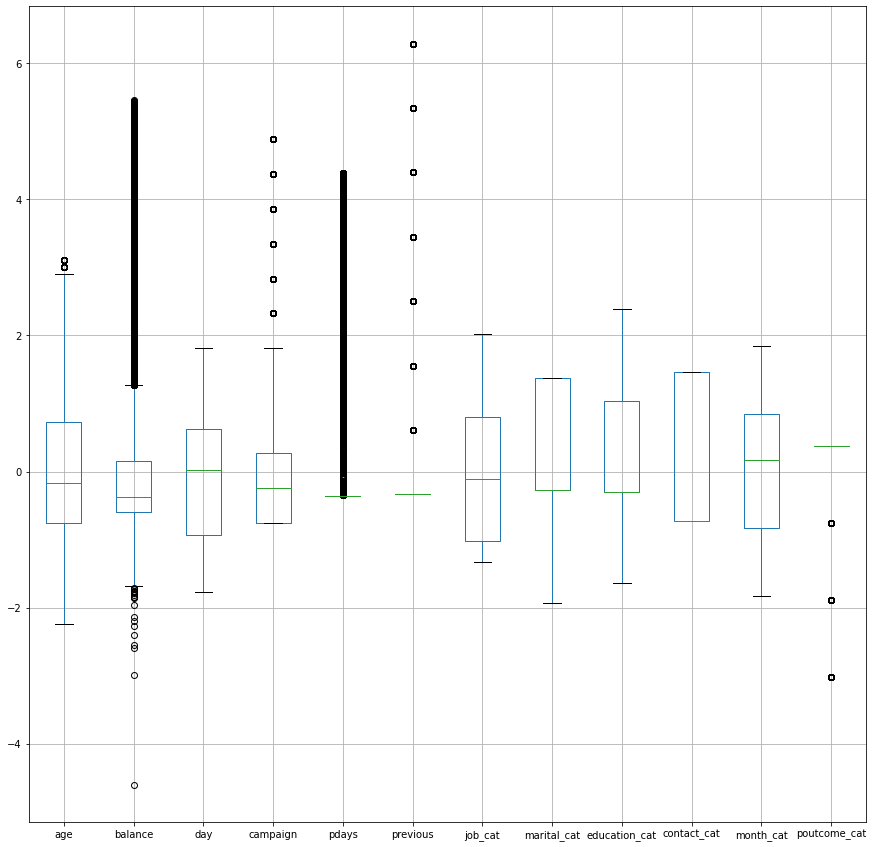

In [37]:
#Visualizing through boxplot diagram

fig = plt.figure(figsize=(15,15))

col = [data_dup['age'], data_dup['balance'], data_dup['day'],data_dup['campaign'],data_dup['pdays'],data_dup['previous'],data_dup['job_cat'],data_dup['marital_cat'],data_dup['education_cat'],data_dup['contact_cat'],data_dup['month_cat'],data_dup['poutcome_cat']]

data_dup.boxplot(num_columns)

**Feature engineering**

 

In [38]:


features_for_pca= data_dup.drop('y',axis=1)
pca = PCA(n_components=10)
pca.fit(features_for_pca)
ratio_sum = pca.explained_variance_ratio_.cumsum()
ratio_sum

array([0.21898875, 0.34280525, 0.45807493, 0.54630495, 0.63290916,
       0.70968507, 0.77951281, 0.84598027, 0.8937937 , 0.93739093])

**Applying Multi Layer Perceptron**

In [39]:
labels = data_dup['y']
features = data_dup.drop('y', axis=1)

In [40]:

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)


In [41]:
MLPClassifier = MLPClassifier(hidden_layer_sizes=(50,200,50), activation='relu',max_iter=300,solver='adam', random_state=1)
MLPClassifier.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 200, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [42]:
train_prediction = MLPClassifier.predict(x_train)
test_prediction = MLPClassifier.predict(x_test)
print('Accuracy on training data:',+metrics.accuracy_score(y_train,train_prediction))
print('Accuracy on test data:', +metrics.accuracy_score(y_test,test_prediction))


Accuracy on training data: 0.9898964777567072
Accuracy on test data: 0.8648346182541656
